In [5]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [6]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

In [7]:
data = yf.download("LTC-USD", start="2021-04-01", end="2022-04-01")#Download data from yahoo finance for Litecoin

[*********************100%***********************]  1 of 1 completed


In [8]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-31,196.688950,199.282684,189.491013,197.499100,197.499100,3416343750
2021-04-01,197.524368,205.466995,195.942993,204.112518,204.112518,3871809467
2021-04-02,204.053619,214.403564,202.508560,213.228394,213.228394,4095228243
2021-04-03,213.159744,218.240234,197.146210,197.148209,197.148209,4020429578
2021-04-04,197.109772,206.219879,195.534042,204.042908,204.042908,2866830149


In [9]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-27,124.889275,129.397476,123.675545,129.397476,129.397476,740569100
2022-03-28,129.400635,132.412476,127.852745,127.938614,127.938614,943699101
2022-03-29,127.911484,131.786041,127.729424,130.061234,130.061234,837905297
2022-03-30,130.054733,133.906784,127.102615,131.169342,131.169342,928949835
2022-03-31,131.166367,132.776428,122.522713,123.716011,123.716011,1352615724


In [10]:
data['Adj Close'].head()

Date
2021-03-31    197.499100
2021-04-01    204.112518
2021-04-02    213.228394
2021-04-03    197.148209
2021-04-04    204.042908
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

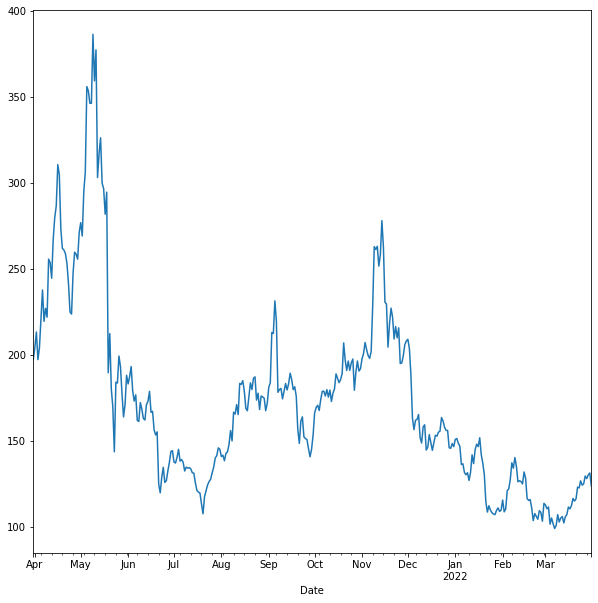

In [11]:
data['Adj Close'].plot(figsize=(10, 10), subplots=True)#Shows price movement for the last year

In [12]:
normal_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[0.03348581633077991,
 0.044661029708483055,
 -0.07541296291949642,
 0.03497216203487456,
 0.08344391136328352]

In [13]:
normal_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[0.03348581633077991,
 0.044661029708483055,
 -0.07541296291949642,
 0.03497216203487456,
 0.08344391136328352]

In [14]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 0.15111785 and its annulized volatility is 1.09422376


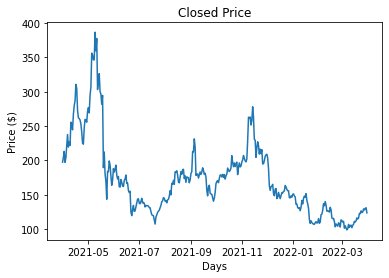

In [15]:
fig = plt.figure()
plt.plot(data['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');

# Binominal Tree

In [16]:
import os

In [17]:
S0 = 123.71             # spot assest price as at 13:19 31/03/2022
K = 150.00              # strike
T = 0.019               # maturity 
r = 0.0168                # risk free rate 
sig = 1.09422376        # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff 

In [18]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u  

In [19]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [20]:
S

array([[123.71      , 134.96573043, 147.24556133, 160.64267026],
       [  0.        , 113.39296317, 123.71      , 134.96573043],
       [  0.        ,   0.        , 103.93633575, 113.39296317],
       [  0.        ,   0.        ,   0.        ,  95.26836223]])

In [21]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.47885373948965637

In [22]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 15.03426957],
       [ 0.        ,  0.        ,  0.        , 36.60703683],
       [ 0.        ,  0.        ,  0.        , 54.73163777]])

# European Option

In [23]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[27.41033686, 17.44220761,  7.83421976,  0.        ],
       [ 0.        , 36.57512023, 26.27404085, 15.03426957],
       [ 0.        ,  0.        , 46.0477051 , 36.60703683],
       [ 0.        ,  0.        ,  0.        , 54.73163777]])

In [24]:
print('European ' + payoff, str( V[0,0]))

European put 27.41033686091598


# American Option

In [25]:
# for American Option
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[27.43095011, 17.45052378,  7.83421976,  0.        ],
       [ 0.        , 36.60703683, 26.29      , 15.03426957],
       [ 0.        ,  0.        , 46.06366425, 36.60703683],
       [ 0.        ,  0.        ,  0.        , 54.73163777]])

In [26]:
print('American ' + payoff, str( V[0,0]))

American put 27.430950113992267


In [27]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [28]:
T = 1/52
r = 0.0168
sigma = 1.094 
S0 = 123.71
K = 150.00

In [29]:
S = mcs_simulation_np(1000)

In [30]:
S = np.transpose(S)
S

array([[123.71      , 123.91186655, 123.33902082, ..., 106.83679125,
        107.42740518, 107.18247091],
       [123.71      , 124.10298353, 123.70183935, ..., 139.56910243,
        140.45934484, 140.44740444],
       [123.71      , 124.27858129, 125.56037744, ..., 112.17563735,
        112.05821011, 111.42203833],
       ...,
       [123.71      , 122.92255481, 123.00177057, ..., 176.65111902,
        177.39415066, 177.19257038],
       [123.71      , 123.9721878 , 125.22864466, ..., 113.27385038,
        113.26679029, 113.92730633],
       [123.71      , 123.30002033, 122.50132563, ..., 139.67984687,
        140.04901188, 141.73991972]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

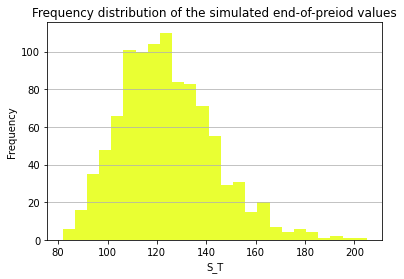

In [31]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#E9FF33',alpha=1, rwidth=2.5)

plt.grid(axis='y', alpha=0.95)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [32]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 27.102141815028503


In [33]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 1.2356934071281631


# Delta

In [34]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [35]:
S = np.linspace(50, 100, 31)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 150, T[i], 1.66, 0.00, 1.094, 'call')

/var/folders/_q/xlnmt_0s70q315l13v4yz_w00000gn/T/ipykernel_36646/1295009987.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


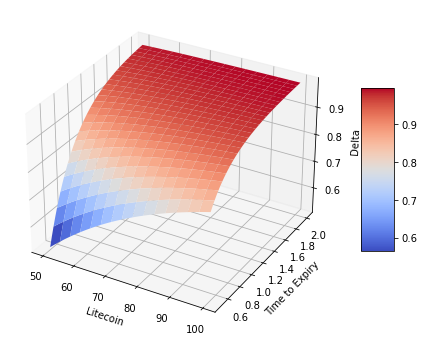

In [36]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Litecoin')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [37]:
d = delta(100, 150, 1, 1.66, 0.00, 1.094, 'call')
print('The value of Delta is', d.round(4),'.','If Litecoin increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.9548 . If Litecoin increase 1 dollar, then the value of the option will increase $ 0.9548 .


# Gamma

In [38]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [39]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 150, T[i], 1.66, 0.00, 1.094, 'call')

/var/folders/_q/xlnmt_0s70q315l13v4yz_w00000gn/T/ipykernel_36646/2927511716.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


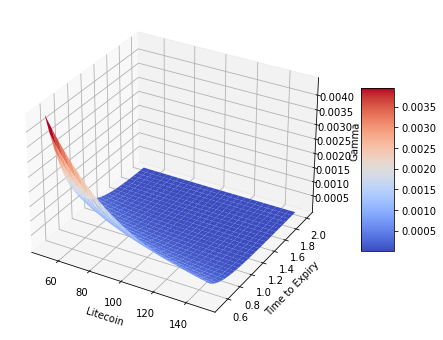

In [40]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Litecoin')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [54]:
d = delta(100, 150, 1, 1.66, 0.00, 1.094, 'call')
print('The value of Gamma is', d.round(4),'.','If Litecoin increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Gamma is 0.9548 . If Litecoin increase 1 dollar, then the value of the option will increase $ 0.9548 .


# Speed

In [41]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [42]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 150, T[i], 1.66, 0.00, 1.094, 'call')

/var/folders/_q/xlnmt_0s70q315l13v4yz_w00000gn/T/ipykernel_36646/553235785.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


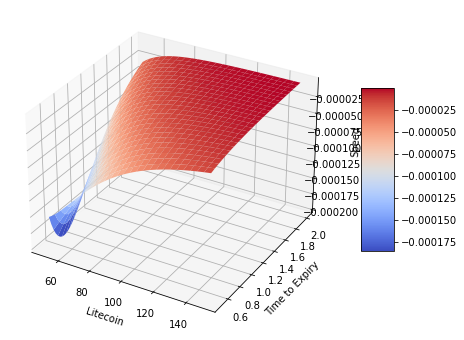

In [43]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Litecoin')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [55]:
d = delta(100, 150, 1, 1.66, 0.00, 1.094, 'call')
print('The value of Speed is', d.round(4),'.','If Litecoin increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Speed is 0.9548 . If Litecoin increase 1 dollar, then the value of the option will increase $ 0.9548 .


# Theta

In [44]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [45]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 150, T[i], 1.66, 0.00, 1.094, 'call')

/var/folders/_q/xlnmt_0s70q315l13v4yz_w00000gn/T/ipykernel_36646/889925695.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


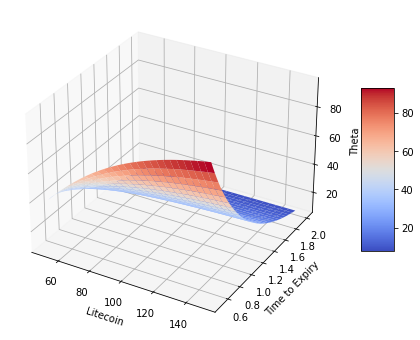

In [46]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Litecoin')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [56]:
d = delta(100, 150, 1, 1.66, 0.00, 1.094, 'call')
print('The value of Theta is', d.round(4),'.','If Litecoin increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Theta is 0.9548 . If Litecoin increase 1 dollar, then the value of the option will increase $ 0.9548 .


# Rho

In [47]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [48]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 150, T[i], 1.66, 0.00, 1.094, 'call')

/var/folders/_q/xlnmt_0s70q315l13v4yz_w00000gn/T/ipykernel_36646/3534911070.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


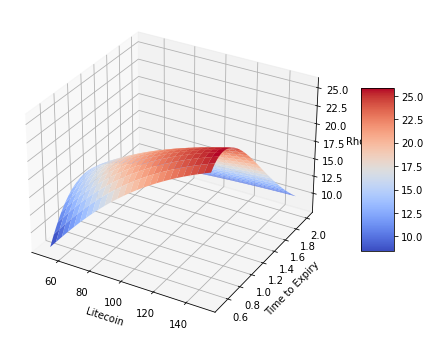

In [49]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Litecoin')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [57]:
d = delta(100, 150, 1, 1.66, 0.00, 1.094, 'call')
print('The value of Rho is', d.round(4),'.','If Litecoin increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Rho is 0.9548 . If Litecoin increase 1 dollar, then the value of the option will increase $ 0.9548 .


# Vega

In [50]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [51]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 150, T[i], 1.66, 0.00, 1.094, 'call')

/var/folders/_q/xlnmt_0s70q315l13v4yz_w00000gn/T/ipykernel_36646/2468107643.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


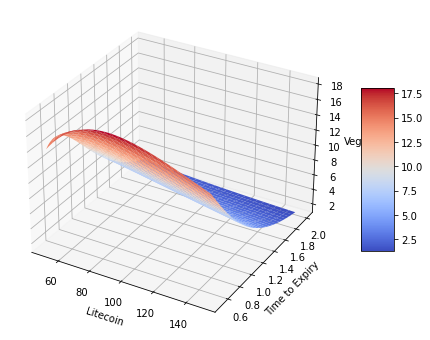

In [52]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Litecoin')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [58]:
v = vega(100, 150, 1, 1.66, 0.00, 1.094, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 9.5053 . If the volatility increases 1%, then the value of the option will increase $ 0.095053 .
